# Multivariate Model to Predict Covid Deceases

#### xyz

* xyz

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st


In [5]:
# Setting route of file from https://ourworldindata.org/coronavirus-source-data
file_to_load = "Resources/owid-covid-data.csv"
# Reading File and store into Pandas data frame
covid_df = pd.read_csv(file_to_load, encoding="ISO-8859-1")
print(covid_df.shape)
covid_df.head(3)

(52222, 41)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
#To visualize all the columns available
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [6]:
#Setting the cut off date of the study as of September 30th 
RegressCovid = covid_df.loc[(covid_df["date"]=="2020-09-30")]

#Narrowing the DataFrame to the columns subject to study
RegressCovid = RegressCovid[["iso_code", "continent", "location", "date", "total_deaths_per_million","population", 
                             "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
                             "hospital_beds_per_thousand", "life_expectancy", "human_development_index"]]
#To visually evaluate the consistency of the data populated in the columns
RegressCovid.count()

iso_code                      211
continent                     210
location                      212
date                          212
total_deaths_per_million      191
population                    211
gdp_per_capita                184
extreme_poverty               122
cardiovasc_death_rate         186
diabetes_prevalence           194
hospital_beds_per_thousand    165
life_expectancy               208
human_development_index       180
dtype: int64

In [13]:
#Data cleansing dropping all NaN
RegressCovid = RegressCovid.dropna()
RegressCovid.count()

index                         103
iso_code                      103
continent                     103
location                      103
date                          103
total_deaths_per_million      103
population                    103
gdp_per_capita                103
extreme_poverty               103
cardiovasc_death_rate         103
diabetes_prevalence           103
hospital_beds_per_thousand    103
life_expectancy               103
human_development_index       103
dtype: int64

In [9]:
#Creating a csv file ofr backup purposes
RegressCovid.to_csv("RegressCovid.csv", index=False, header=True)
#Reseting index
RegressCovid = RegressCovid.reset_index()
#Displaying the Final DataFrame subject to study
RegressCovid

,index,iso_code,continent,location,date,total_deaths_per_million,population,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,504,ALB,Europe,Albania,2020-09-30,133.435,2877800.0,11803.431,1.1,304.195,10.08,2.89,78.57,0.785
1,803,DZA,Africa,Algeria,2020-09-30,39.361,43851043.0,13913.839,0.5,278.364,6.73,1.90,76.88,0.754
2,1916,ARG,South America,Argentina,2020-09-30,365.499,45195777.0,18933.907,0.6,191.032,5.50,5.00,76.67,0.825
3,2215,ARM,Asia,Armenia,2020-09-30,323.295,2963234.0,8787.580,1.8,341.010,7.11,4.20,75.09,0.755
4,2735,AUS,Oceania,Australia,2020-09-30,34.588,25499881.0,44648.710,0.5,107.791,5.07,3.84,83.44,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,49808,URY,South America,Uruguay,2020-09-30,13.818,3473727.0,20551.409,0.1,160.708,6.93,2.80,77.91,0.804
99,50781,VNM,Asia,Vietnam,2020-09-30,0.360,97338583.0,6171.884,2.0,245.465,6.00,2.60,75.40,0.694
100,51161,YEM,Asia,Yemen,2020-09-30,19.714,29825968.0,1479.147,18.8,495.003,5.35,0.70,66.12,0.452
101,51381,ZMB,Africa,Zambia,2020-09-30,18.059,18383956.0,3689.251,57.5,234.499,3.94,2.00,63.89,0.588


### Multivariate Models

In [19]:
#Importing two interfaces from statsmodels library specialized in multiple linel models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
# AVAILABLE VARIABLES SUBJECT TO STUDY
#"population", "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
# "hospital_beds_per_thousand", "life_expectancy", "human_development_index"

# VARIABLES WITH NO STATISTICAL SIGNIFICANCE NOR PREDICTANCE POWER: 
# "population", "gdp_per_capita", "extreme_poverty", "diabetes_prevalence", 
# "hospital_beds_per_thousand", "human_development_index"

#Attempt #1
#X = RegressCovid[["cardiovasc_death_rate", "gdp_per_capita", "life_expectancy"]] # ,  


X = RegressCovid[["cardiovasc_death_rate", "life_expectancy" ]]  
y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"{round(coefficients[0],4)} cardiovasc_death_rate + {round(coefficients[1],4)} life_expectancy"
print(f"The equation model is {equation_model}")

print(results.summary())

The equation model is -0.7218 cardiovasc_death_rate + 4.7191 life_expectancy
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.485
Model:                                  OLS   Adj. R-squared (uncentered):              0.475
Method:                       Least Squares   F-statistic:                              47.61
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    2.72e-15
Time:                              14:38:08   Log-Likelihood:                         -691.11
No. Observations:                       103   AIC:                                      1386.
Df Residuals:                           101   BIC:                                      1391.
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                  

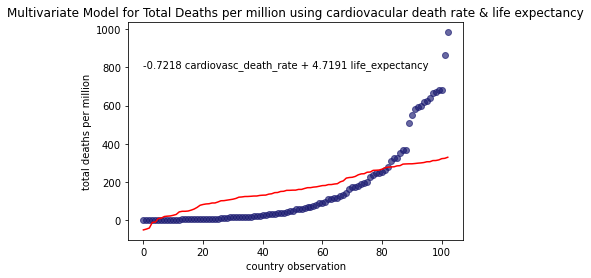

In [60]:
#Plotting the model
x_axis = np.arange(0, len(RegressCovid["iso_code"]), 1)

sorted_y = y.sort_values()

predicted_y = results.predict(X)
predicted_y = predicted_y.sort_values()

plt.scatter(x_axis, sorted_y, alpha = 0.65, color = "midnightblue")
plt.plot(x_axis, predicted_y,"r-") 
plt.annotate(equation_model,(0,800),fontsize=10,color="black")
plt.title(f"Multivariate Model for Total Deaths per million using cardiovacular death rate & life expectancy")
plt.xlabel("country observation")
plt.ylabel("total deaths per million")
#plt.savefig("regress2.png")
plt.show()


### This is the same multivariate exercise using excel

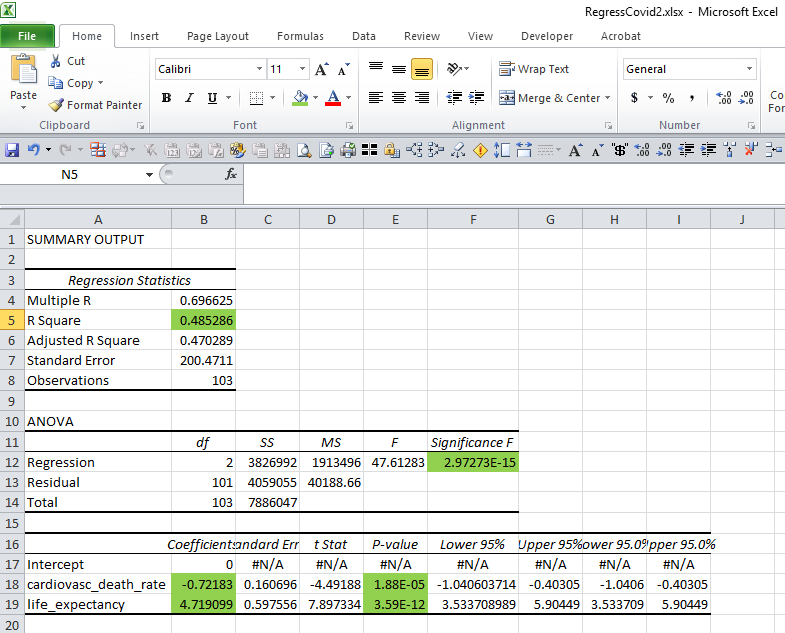
